# Exploratory Data Analysis

In order to understand the data better, we need to explore the data and note the relationship between the independent variables and the objective.

# Preparing the environment

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../ecommerce_customer_churn_prevention')
from utils import paths
from visualization import visualize

# Importing the data


In [9]:
df = pd.read_csv(paths.data_interim_dir('df_etl_processed.csv'))
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN         Mobile Phone         1              8.0   
2       50003      1     NaN         Mobile Phone         1             30.0   
3       50004      1     0.0         Mobile Phone         3             15.0   
4       50005      1     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [10]:
# Converting the features to categorical like the data dictionary

cat_features = ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

df[cat_features] = df[cat_features].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   category
 2   Tenure                       5366 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   category
 5   WarehouseToHome              5379 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5375 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   int64   
 12  MaritalStatus                5630 non-null   category
 13  Num

# Univariate analysis

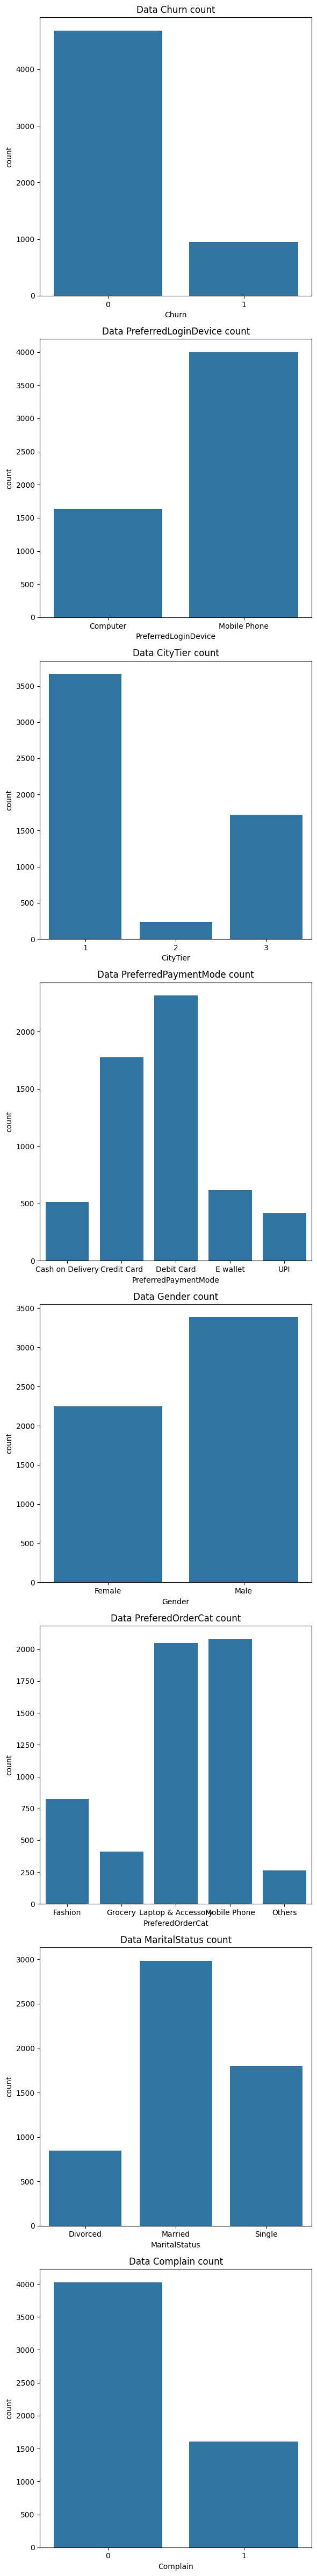

In [11]:
# Plotting categories

visualize.plotting_categories(df, cat_features, name_df='Data')

There are some observations: 

- Churn is the objective feature and it's imbalanced with less than 1000 customers churning vs almost 5000 customers not churning.
- About 4000 people use mobile phone vs ~1650 using computer
- Most of the customers are from tier 1 cities, followed by tier 3 and very few from tier 2.
- Most of the customers use Debit Card and Credit Card as their preferred payment mode.
- Most of the customers use Mobile Phone and Laptop & Accessory as their preferred order category.
- Most of the customers are from Male gender.
- Most of the customers are married.
- Most of the customers do not complain.


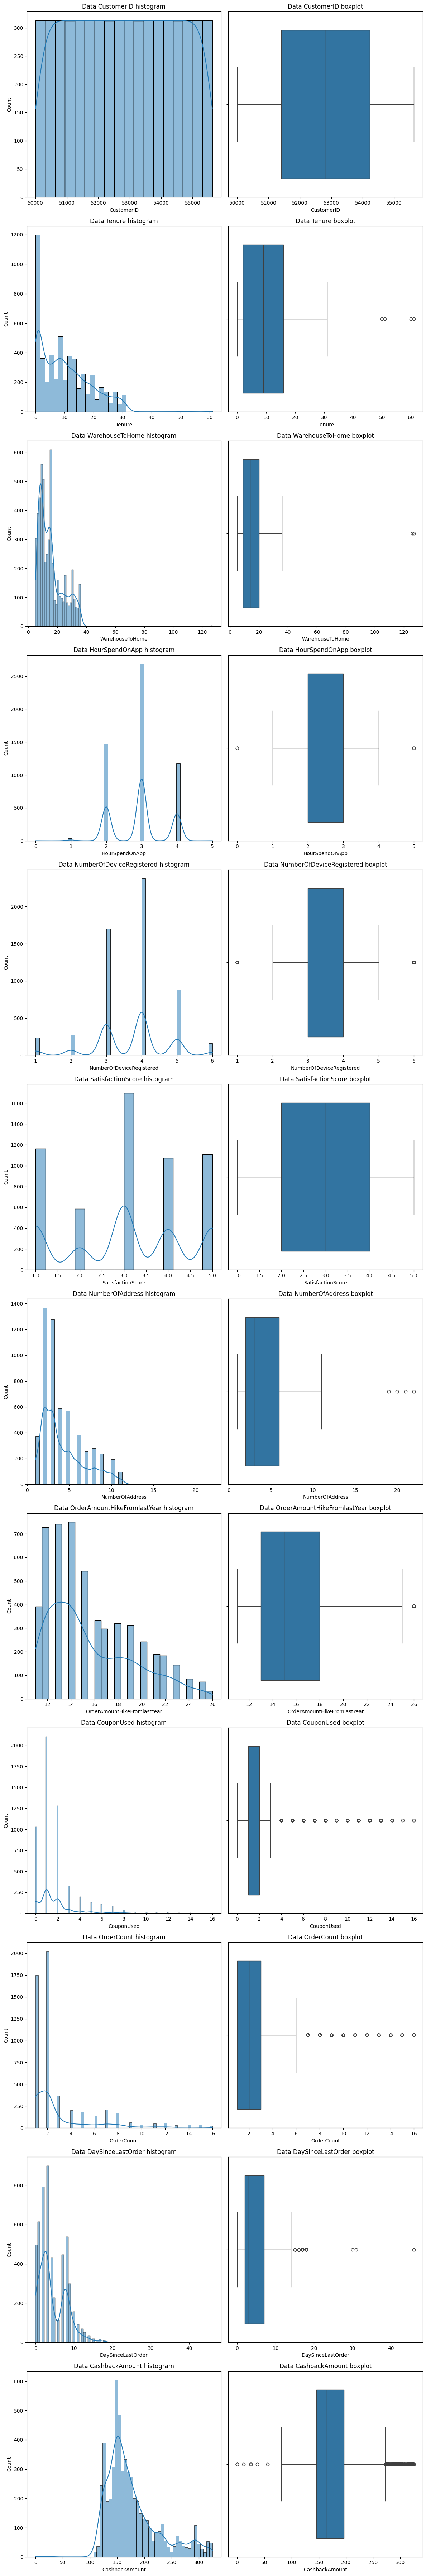

In [12]:
# Checking numerical distributions

num_cols = [col for col in df.columns if col not in cat_features]

visualize.explore_numerical_dist(df, num_cols, name_df='Data')

There are some observations:

- Customer's tenure is right skewed with most of the customers having tenure between 0 and 10, with some outliers over 50 and 60.
- WarehouseToHome is right skewed with most of the customers having the Warehouse between 0 and 20, with some outliers over 120.
- Most of the customers spend 3 hours on average on the ecommerce and most of them have 4 registered devices.
- Most of the customers score their satisfaction with 3 or more.
- Customers have between 1 and 10 addresses, with some of them having around 20.
- In general, customers have made between 11 and 24 order amount hike, some of them have made 26.
- Most of the people have been used between 0 and 2 coupons.
- In general, customers make 1 - 6 orders, people with more than this are considered outliers. Good opportunity to make a deal with those people, since they may have their own business with our commodities.
- Customers usually order between 0 and 14 days between their orders.
- Most of the customers receive between 100 and 275 dollars as cashback, with some outliers over and under this range.

# Bivariate Analysis

This section will be focused on the relationship between the features and the objective feature.

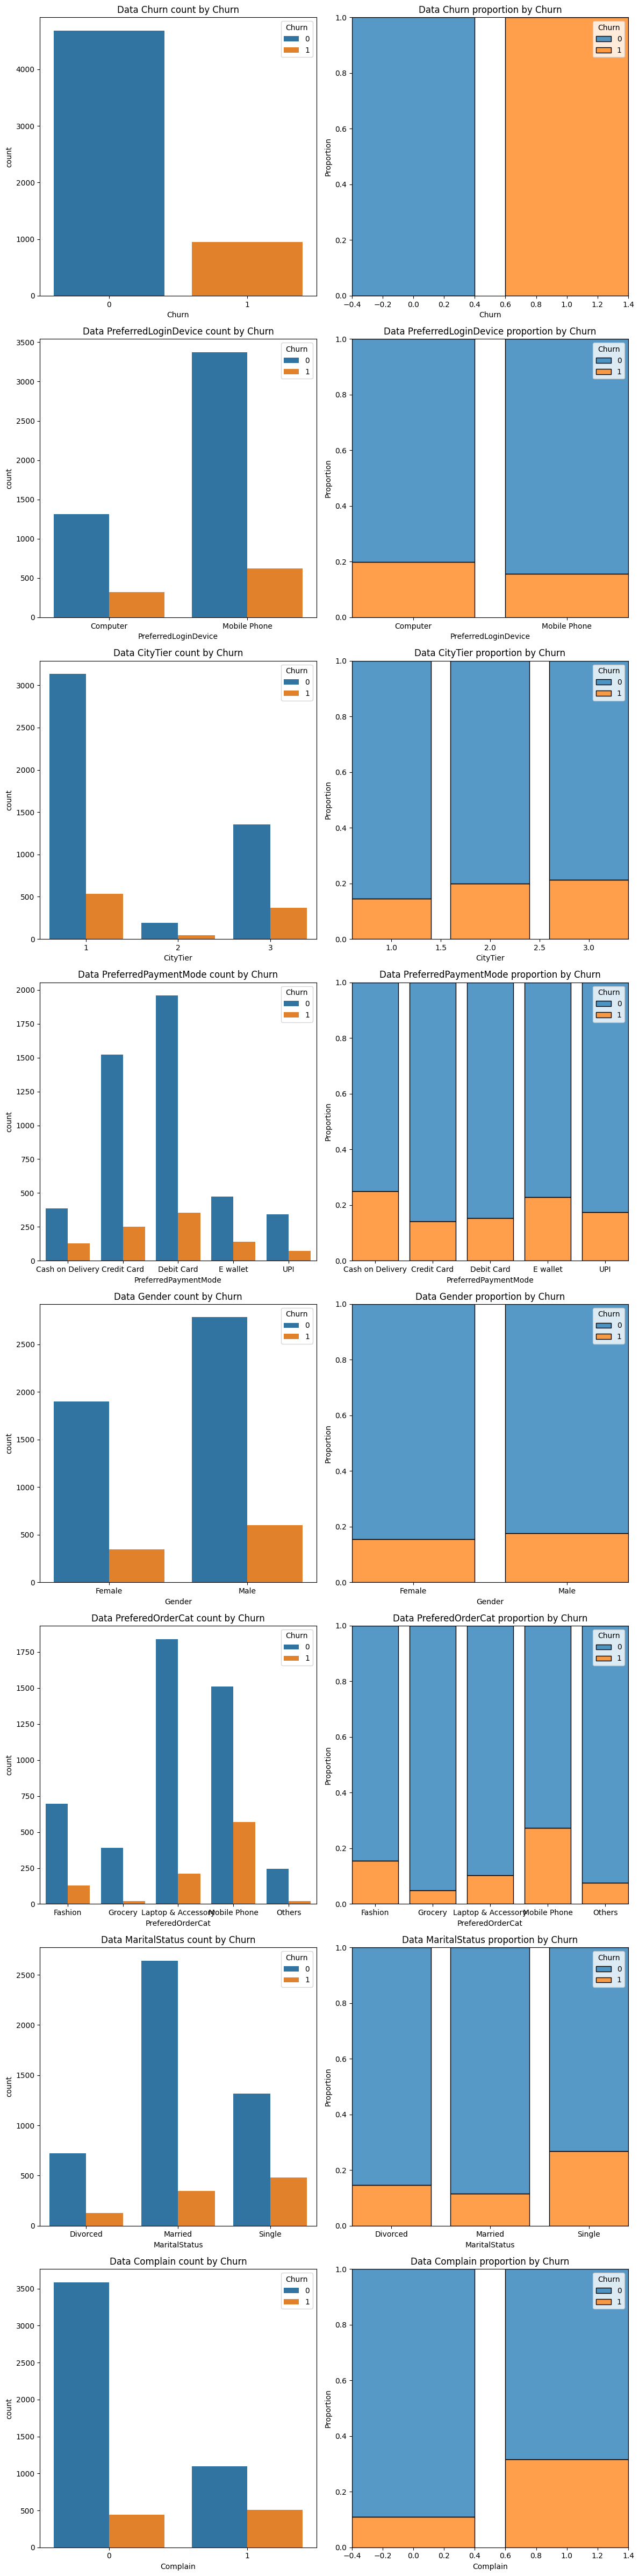

In [13]:
visualize.plotting_categories(df, cat_features, hue='Churn', name_df='Data')

Some observations:

- There are significant differences between the churn and the features PreferredPaymentMethod, PreferedOrderCat, MaritalStatus and Complain.
- Customers who use Cash on Delivery or E wallet as their preferred payment mode are more likely to churn. Maybe there are some issues with the payment process.
- Customers who order Mobile Phone and Fashion are more likely to churn. We should focus on improve the quality of the products and the service.
- Customers who are single are more likely to churn.
- Customers who complain are more likely to churn.

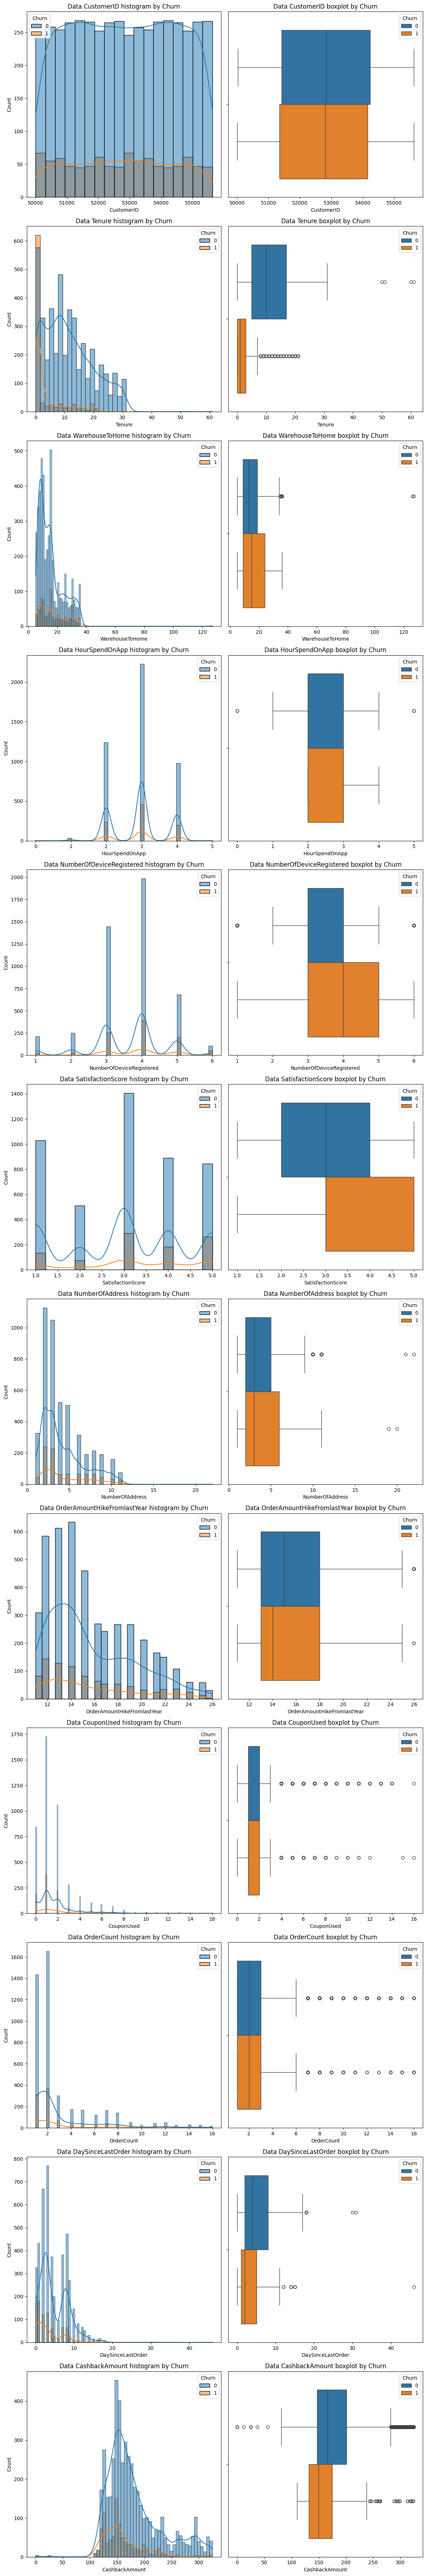

In [14]:
visualize.explore_numerical_dist(df, num_cols, hue='Churn', name_df='Data')

Some interesting observations:

- People with low tenure are more likely to churn.
- People with lower days between orders are more likely to churn.

There are no significant differences between the churn and the other numerical features.

Note: These affirmations will be tested in the next section using statistical tests such as kruskal-wallis and chi-square.


# Multivariate analysis

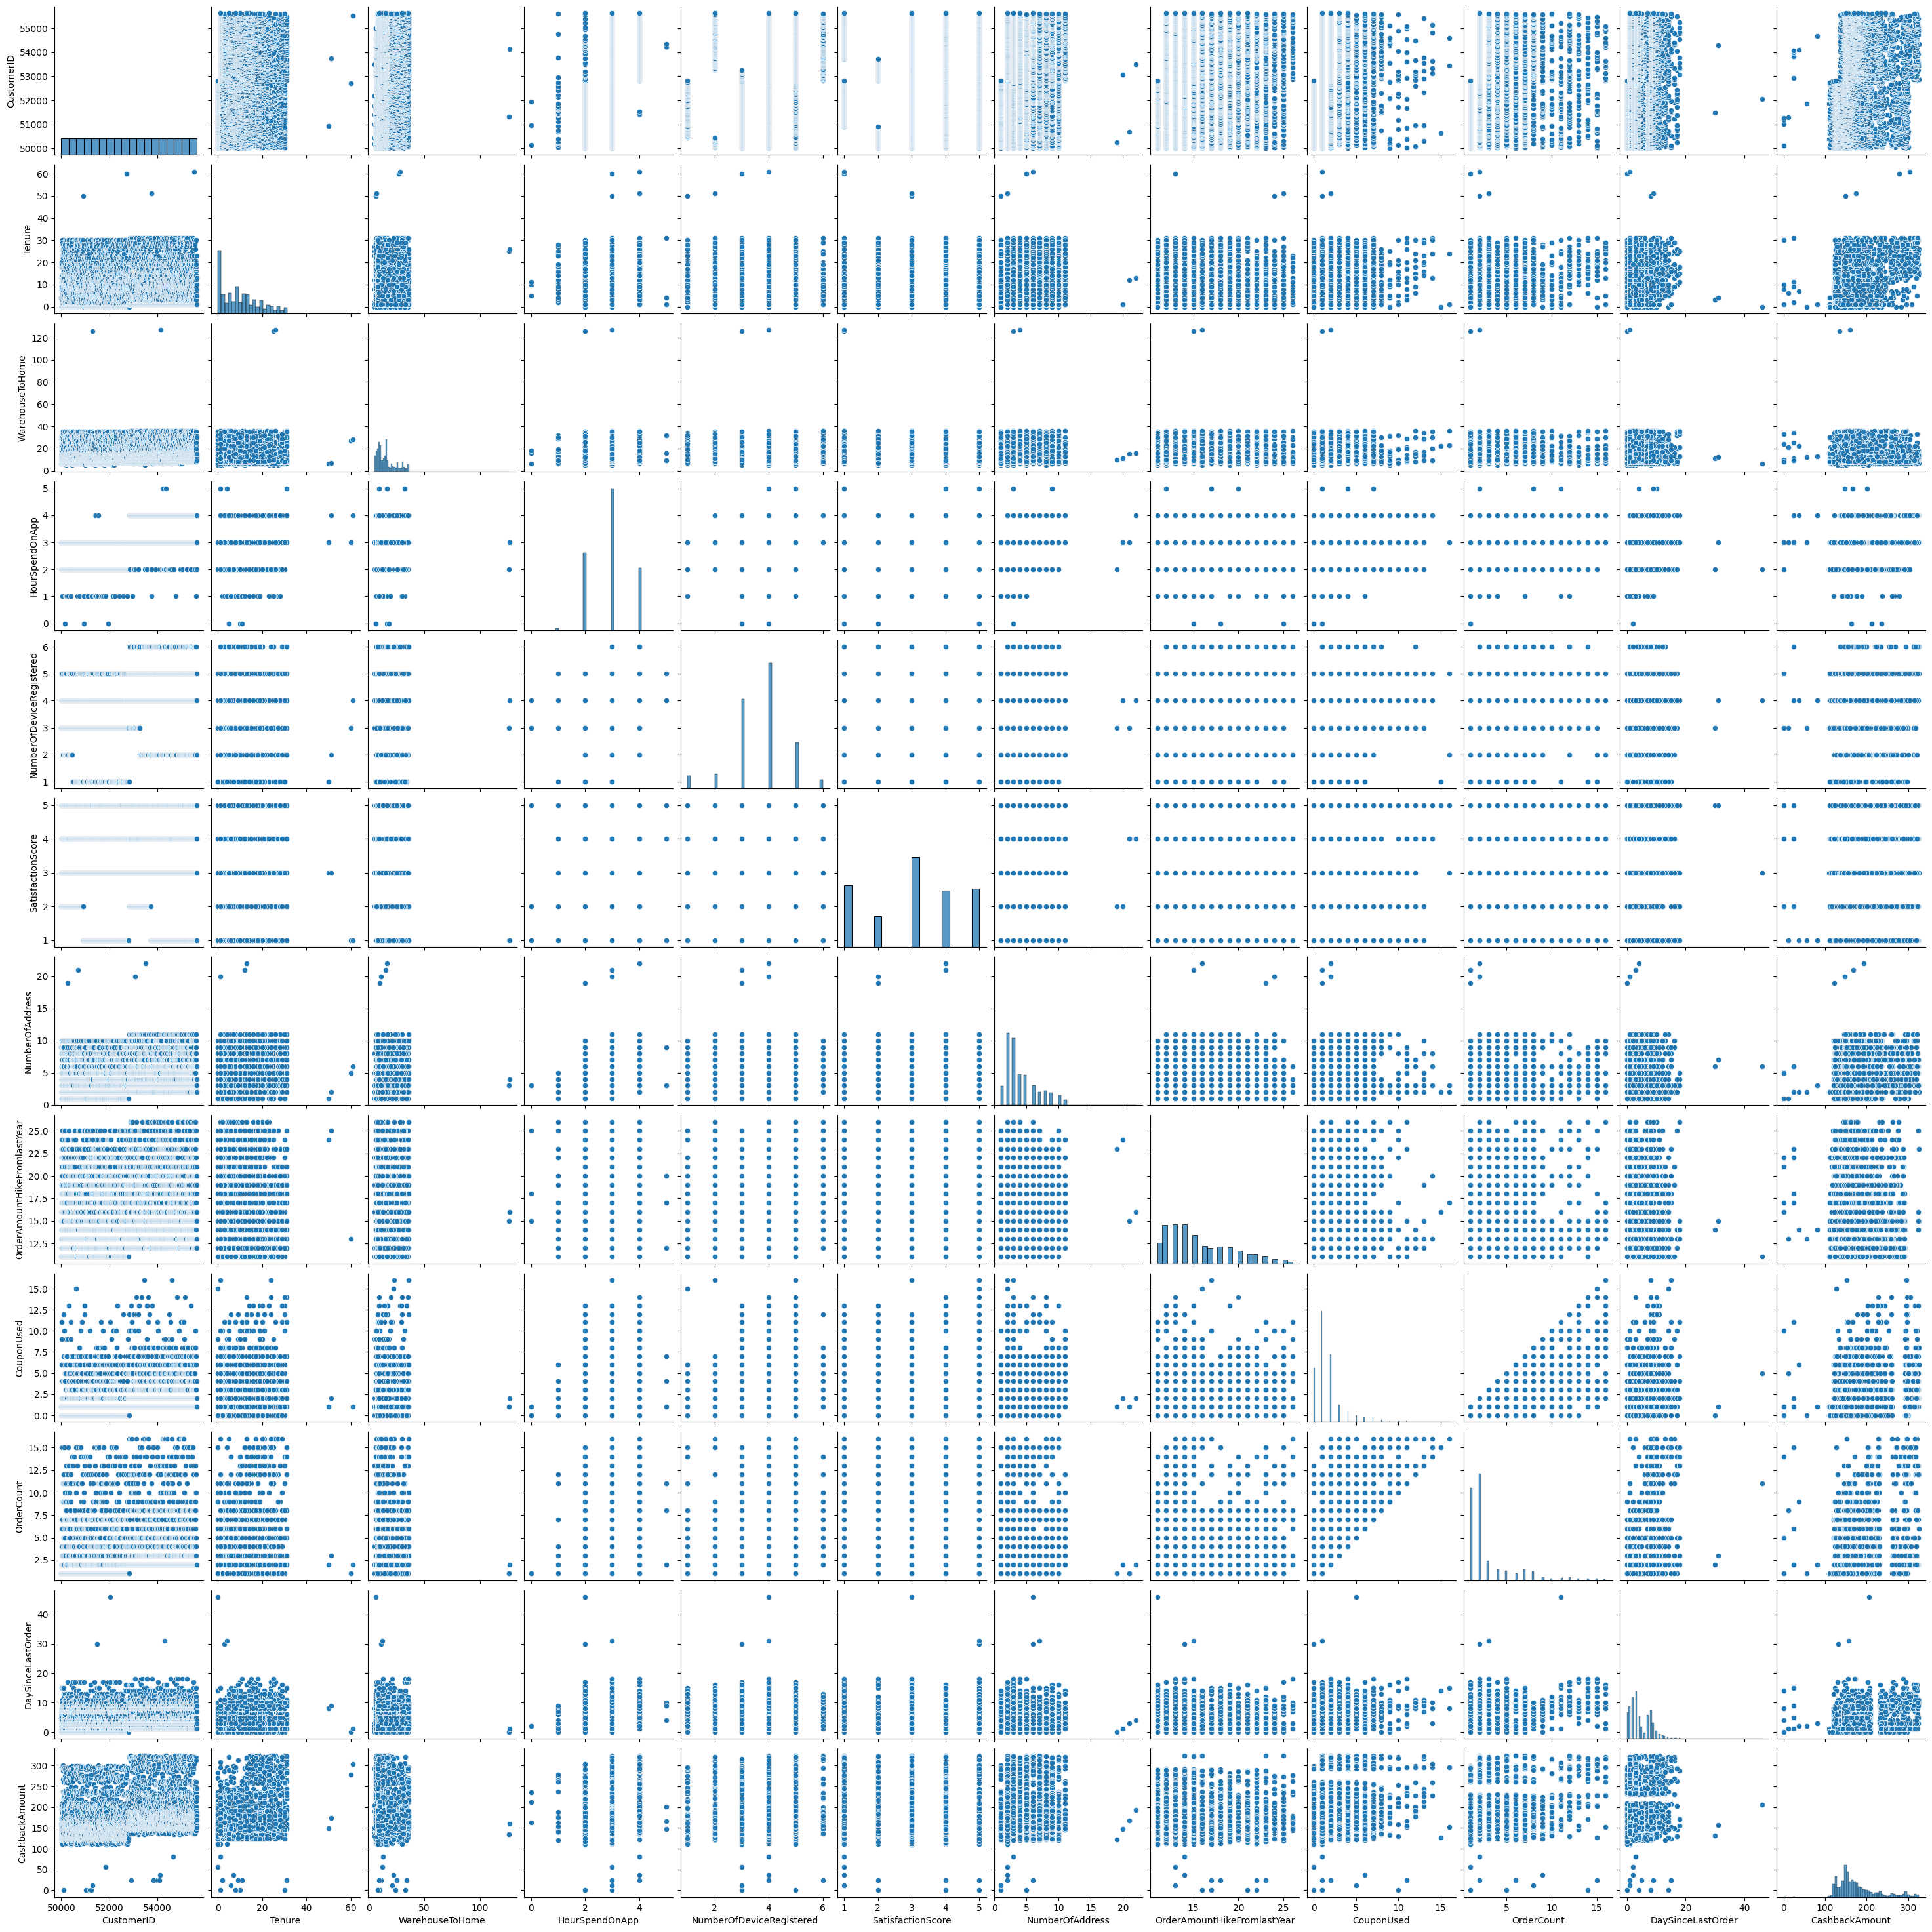

In [16]:
sns.pairplot(data=df)
plt.show()

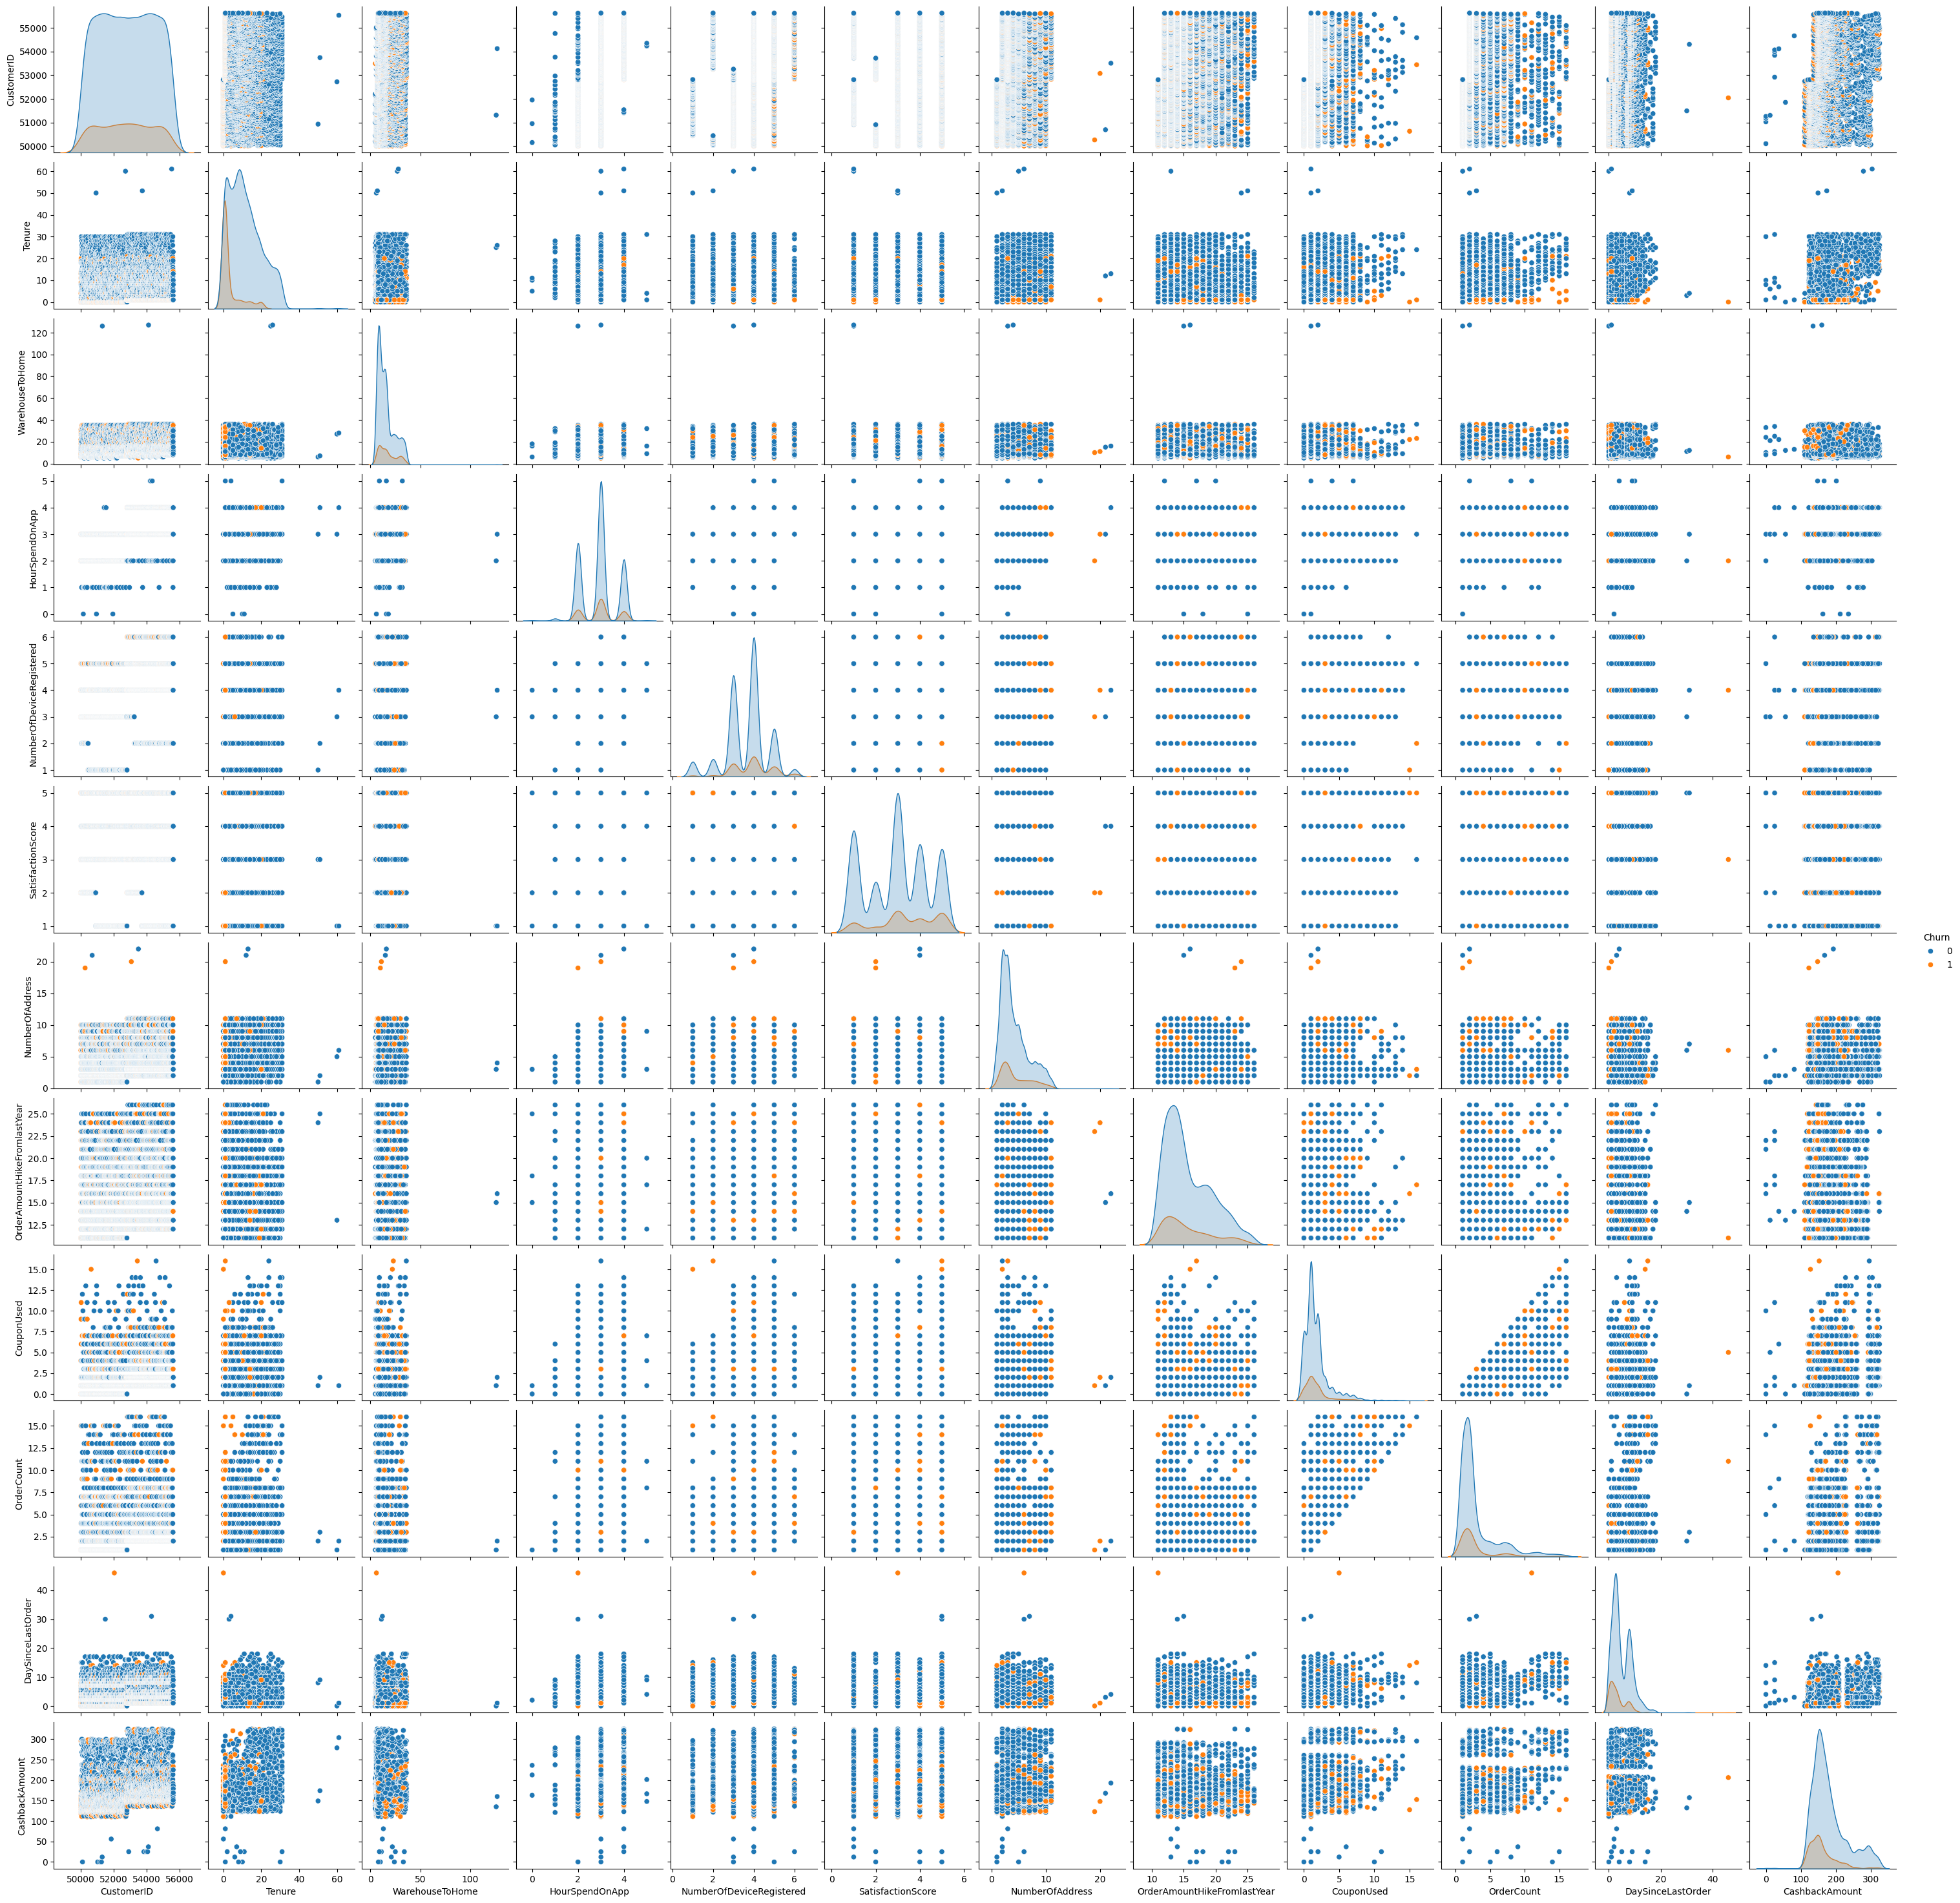

In [15]:
sns.pairplot(data=df, hue='Churn')
plt.show()

No signifficant relationshipts between numerical variables along with Churn.

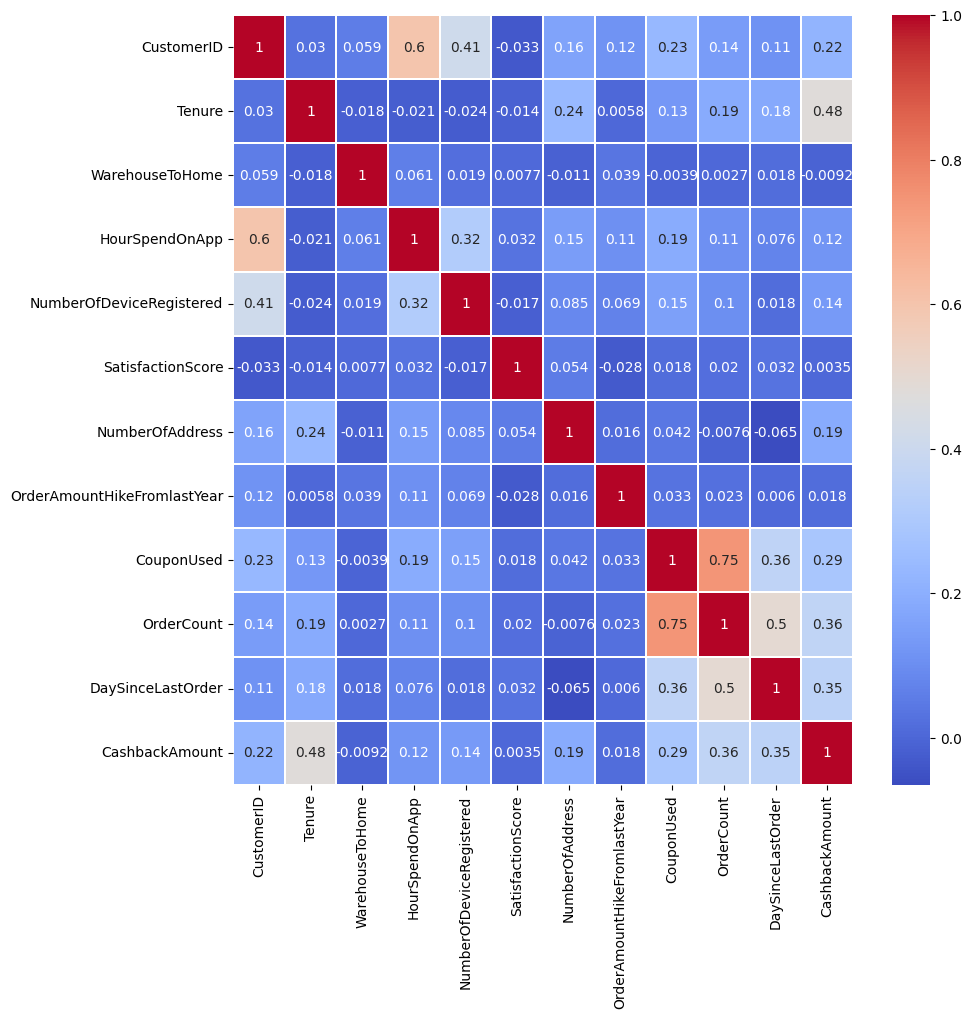

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df[num_cols].corr(), cmap='coolwarm', linewidths=0.1, annot=True)
plt.show()

Some considerable relationships (corr coef > 0.40) between Tenure and CashbackAmount, DaySinceLastOrder and OrderCount, OrderCount and CouponUsed.